# Movie Dataset Exploratory Analysis Project in Python

Dataset from Kaggle : **"Movie Industry"** by *Daniel Grijalva*  
Source: https://www.kaggle.com/datasets/danielgrijalvas/movies

This dataset contains information on 7669 movies from 1986-2020 collected from IMDb database.

## Introduction

In this project, the following questions will be answered:

1) Which  main actor/actress make the most appearances in films? <br>
2) What are the popular genres in the movie industry? How have movie genres changed throughout the years of the dataset? <br>
3) What are the top movies based on revenue (gross), budget, IMDb score and votes? <br>
4) What are the correlations between features? (Eg: budget vs gross)

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import operator

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

## Presenting the Data


In [2]:
# Read the data
df = pd.read_csv(r'C:\Users\siyan\Documents\Data Analysis Projects\Python\movies.csv')

In [3]:
# Checking dimensions (rows and columns)
df.shape

(7668, 15)

In [4]:
# Checking dataset's datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# Quick look at the data (first 5 rows)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Description of the each column is as shown:

> **Budget** : The budget of a movie.
> **Company** : The production company  
> **Country** : Country of origin  
> **Director** : The director   
> **Genre** : Main genre of the movie <br> 
> **Gross**  : Revenue of the movie  
> **Name** : Name of movie   
> **Rating** : Rating of movie (R, PG, etc.) <br>
> **Released** : Release date (YYYY-MM-DD <br>
> **Runtime** : Duration of movie  
> **Score** : IMDb user rating <br> 
> **Votes** : Number of user votes <br> 
> **Star** : Main actor/actress <br>
> **Writer** : Writer of the movie <br> 
> **Year** : Year of release

---

## Data Cleaning

In [6]:
# Check for missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
# Delete all rows with missing data
df = df.dropna()

In [8]:
# Check that there are no more missing data
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [9]:
# Change data type of budget, gross, votes and runtime to int64 to make them a whole number
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [10]:
# Check the data type of budget, gross, votes and runtime again
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [11]:
# Some values from the 'year' column does not match the year from the 'released' column. Hence, there is a need to create a correct Year column.
df['yearcorrect'] = df['released'].astype(str).str.split().str[2]

In [12]:
# Drop any duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


In [13]:
# Dropping off columns that will not be used for analysis.
df_final = df.drop(['year', 'released', 'writer', 'runtime'], axis = 1)

In [14]:
df_final = df_final.dropna()

## Descriptive Statistics
Basic statistics are being presented for each column from the dataset.

In [15]:
# Statistics for numerical variable
df_final_stats = df_final.describe()
df_final_stats = df_final_stats.round(1)
df_final_stats

,score,votes,budget,gross
count,5419.0,5419.0,5419.0,5.419000e+03
mean,6.4,115107.1,36019664.7,1.032675e+08
std,1.0,184428.9,41577211.5,1.873269e+08
min,1.9,195.0,6000.0,3.090000e+02
25%,5.8,19000.0,10000000.0,1.075946e+07
50%,6.5,52000.0,22000000.0,3.691162e+07
75%,7.1,129000.0,45000000.0,1.125251e+08
max,9.3,2400000.0,356000000.0,2.847246e+09


In [16]:
# Statistics for non-numerical variable
cat_variable = pd.DataFrame(df_final[['name','rating', 'genre', 'director', 'star', 'country', 'company','yearcorrect']])
cat_variable = cat_variable.astype('category')
cat_variable.describe()

,name,rating,genre,director,star,country,company,yearcorrect
count,5419,5419,5419,5419,5419,5419,5419,5419
unique,5334,10,15,2061,1844,50,1473,44
top,Hercules,R,Comedy,Woody Allen,Nicolas Cage,United States,Universal Pictures,2011
freq,3,2597,1496,33,40,4318,330,170


## Data Analysis

### 1) Finding main actors/actresses with the most appearances in films 

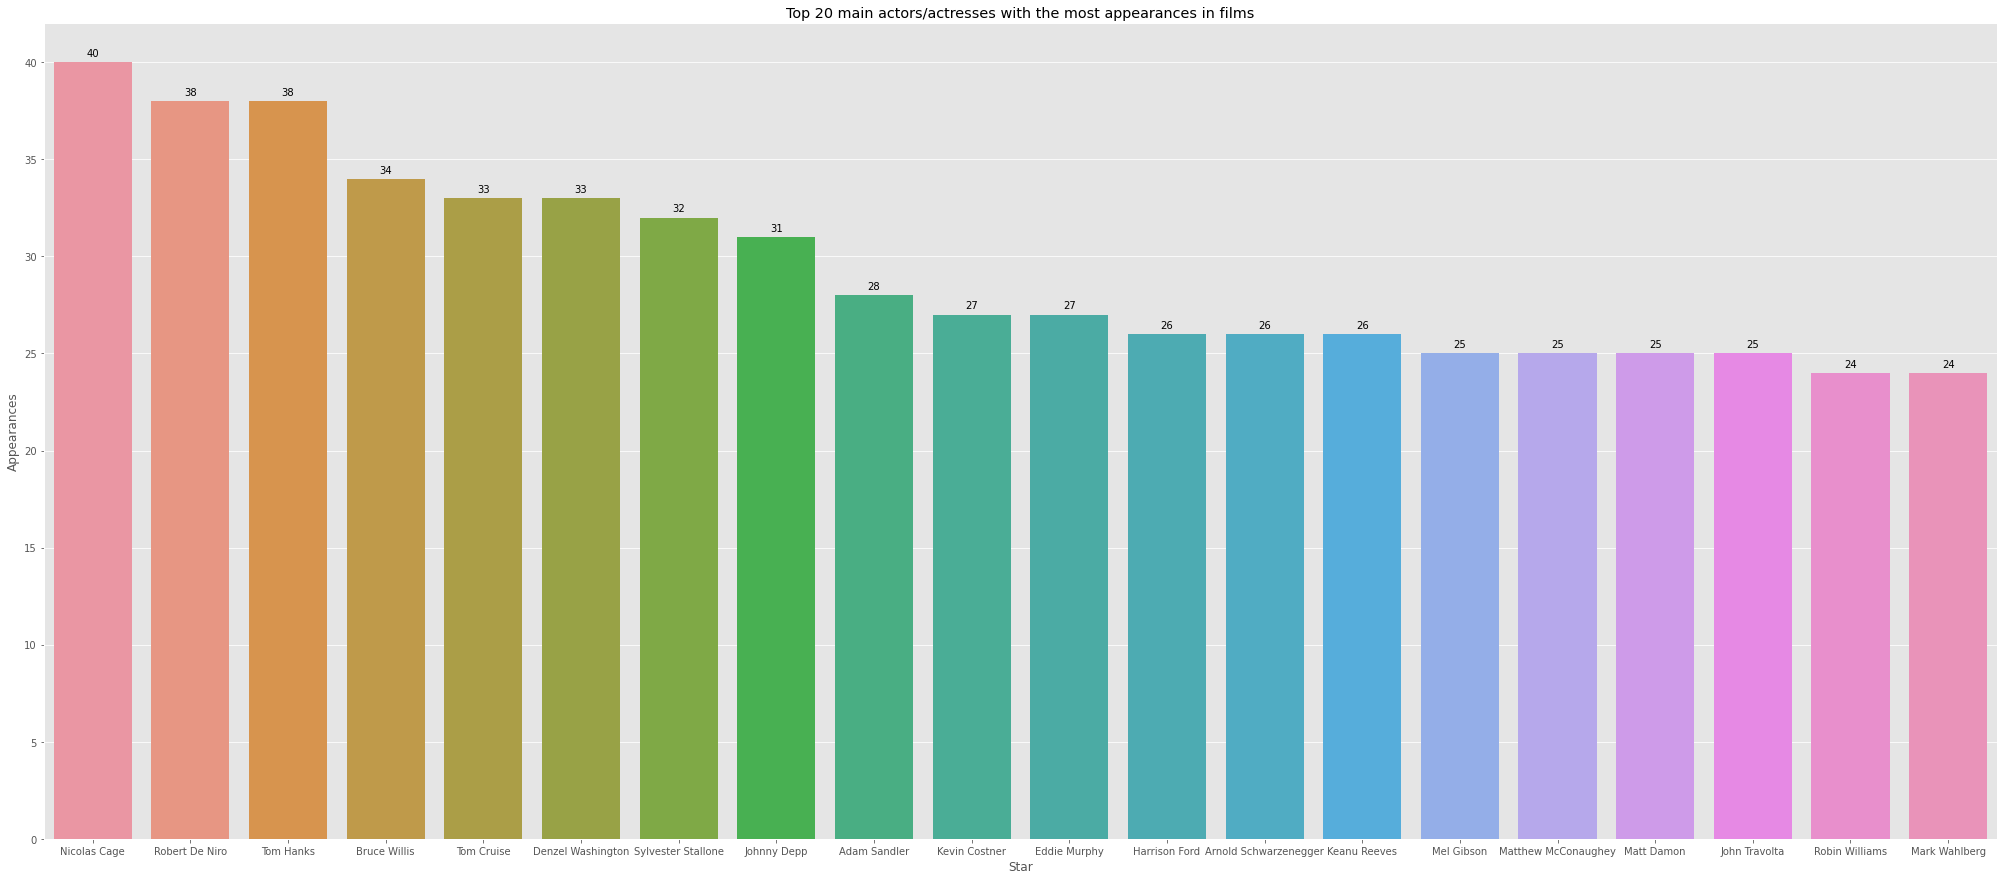

In [17]:
# Get the counts of each category in the 'star' column
star_counts = cat_variable['star'].value_counts()

# Sort and filter to get the top 20 highest counts
top_20_stars = star_counts.nlargest(20).index

# Filter the DataFrame to only include the top 20 'star' values
filtered_data = cat_variable[cat_variable['star'].isin(top_20_stars)]

# Create the countplot and specify the order to sort bars
f, axes = plt.subplots(1, 1, figsize=(35, 15))
ax = sns.countplot(x="star", data=filtered_data, order=top_20_stars)

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')
    
plt.title('Top 20 main actors/actresses with the most appearances in films')
plt.ylabel('Appearances')
plt.xlabel('Star')
plt.show()

From the figure above, the top 5 stars with the biggest number of appearances are Nicolas Cage, Robert De Niro, Tom Hanks, Bruce Willis and Tom Cruise.

### 2) Exploring how movie genres have changed through the years of dataset

Let's explore how movie genres have changed over the years. First, let's find the most popular genre in each year and how many movies are belonged to these genre. Then, I will plot the number of the movie genres that were produced all over these years.

In [18]:
# Group by 'year' and 'genre', and count the occurrences
genre_counts = df_final.groupby(['yearcorrect', 'genre']).size().reset_index(name='count')

#Sort by 'year' and then by 'count' within each year in descending order
genre_counts_sorted = genre_counts.sort_values(['yearcorrect', 'count'], ascending=[True, False])

# Step 3: Drop duplicates to keep only the most popular genre in each year
most_popular_genre_per_year = genre_counts_sorted.drop_duplicates('yearcorrect')

# Display the result
most_popular_genre_per_year = most_popular_genre_per_year.drop([0, 2, 389])
most_popular_genre_per_year

,yearcorrect,genre,count
6,1980,Action,10
18,1981,Comedy,15
26,1982,Comedy,22
38,1983,Comedy,24
47,1984,Comedy,26
52,1985,Action,23
65,1986,Comedy,33
74,1987,Comedy,38
84,1988,Comedy,43
93,1989,Comedy,41


Top movie genres from 1980 to 2020 are action and comedy.

#### 2.1) Movie genre distribution changes from 1980 to 2020

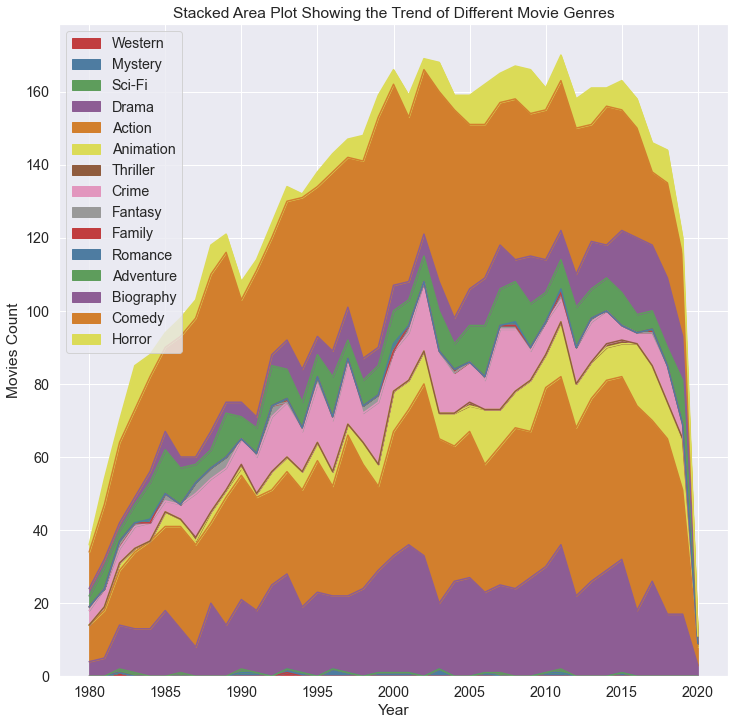

In [19]:
year_set = set()
genre_set = set()
genres_and_year = df_final[["genre", "yearcorrect"]]

# Create a sorted list of unique years of movies
production_year = genres_and_year["yearcorrect"].drop_duplicates()
year_set = sorted(production_year)  # Sort the years

# Create a set of unique genres by parsing all the years
for year in year_set:
    genres_in_year = genres_and_year[genres_and_year.yearcorrect == year]["genre"].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        genre_set.update(genres_row)  # Add genres to the set

# Create a DataFrame with the sum of movies' genre per year
genre_count_per_year_df = pd.DataFrame(index=year_set, columns=genre_set).fillna(0)

for year in year_set:
    genre_dict = {}
    genres_in_year = genres_and_year[genres_and_year.yearcorrect == year]["genre"].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            genre_dict[genre] = genre_dict.get(genre, 0) + 1

    aux_df = pd.DataFrame(genre_dict, index=[year])
    genre_count_per_year_df.loc[year, aux_df.columns] += aux_df.loc[year]

# Drop unwanted rows
genre_count_per_year_df = genre_count_per_year_df.drop(['(United', '(Australia)', 'States)'], errors='ignore')

# Plotting the stacked area chart
sns.set(rc={'figure.figsize': (12, 12)}, font_scale=1.3)
sns.set_palette("Set1", 20, 0.65)

ax = genre_count_per_year_df.plot.area(stacked=True)
ax.set(xlabel='Year', ylabel='Movies Count', title='Stacked Area Plot Showing the Trend of Different Movie Genres')

plt.show()

Generally, the number of movies in each movie genre show an increase in numbers from 1980 to 2020. Action and comedy seems to be the more frequent and prevalent genre in movies through all these years as compared to other genres.

#### 2.2) Explore movie count by genres

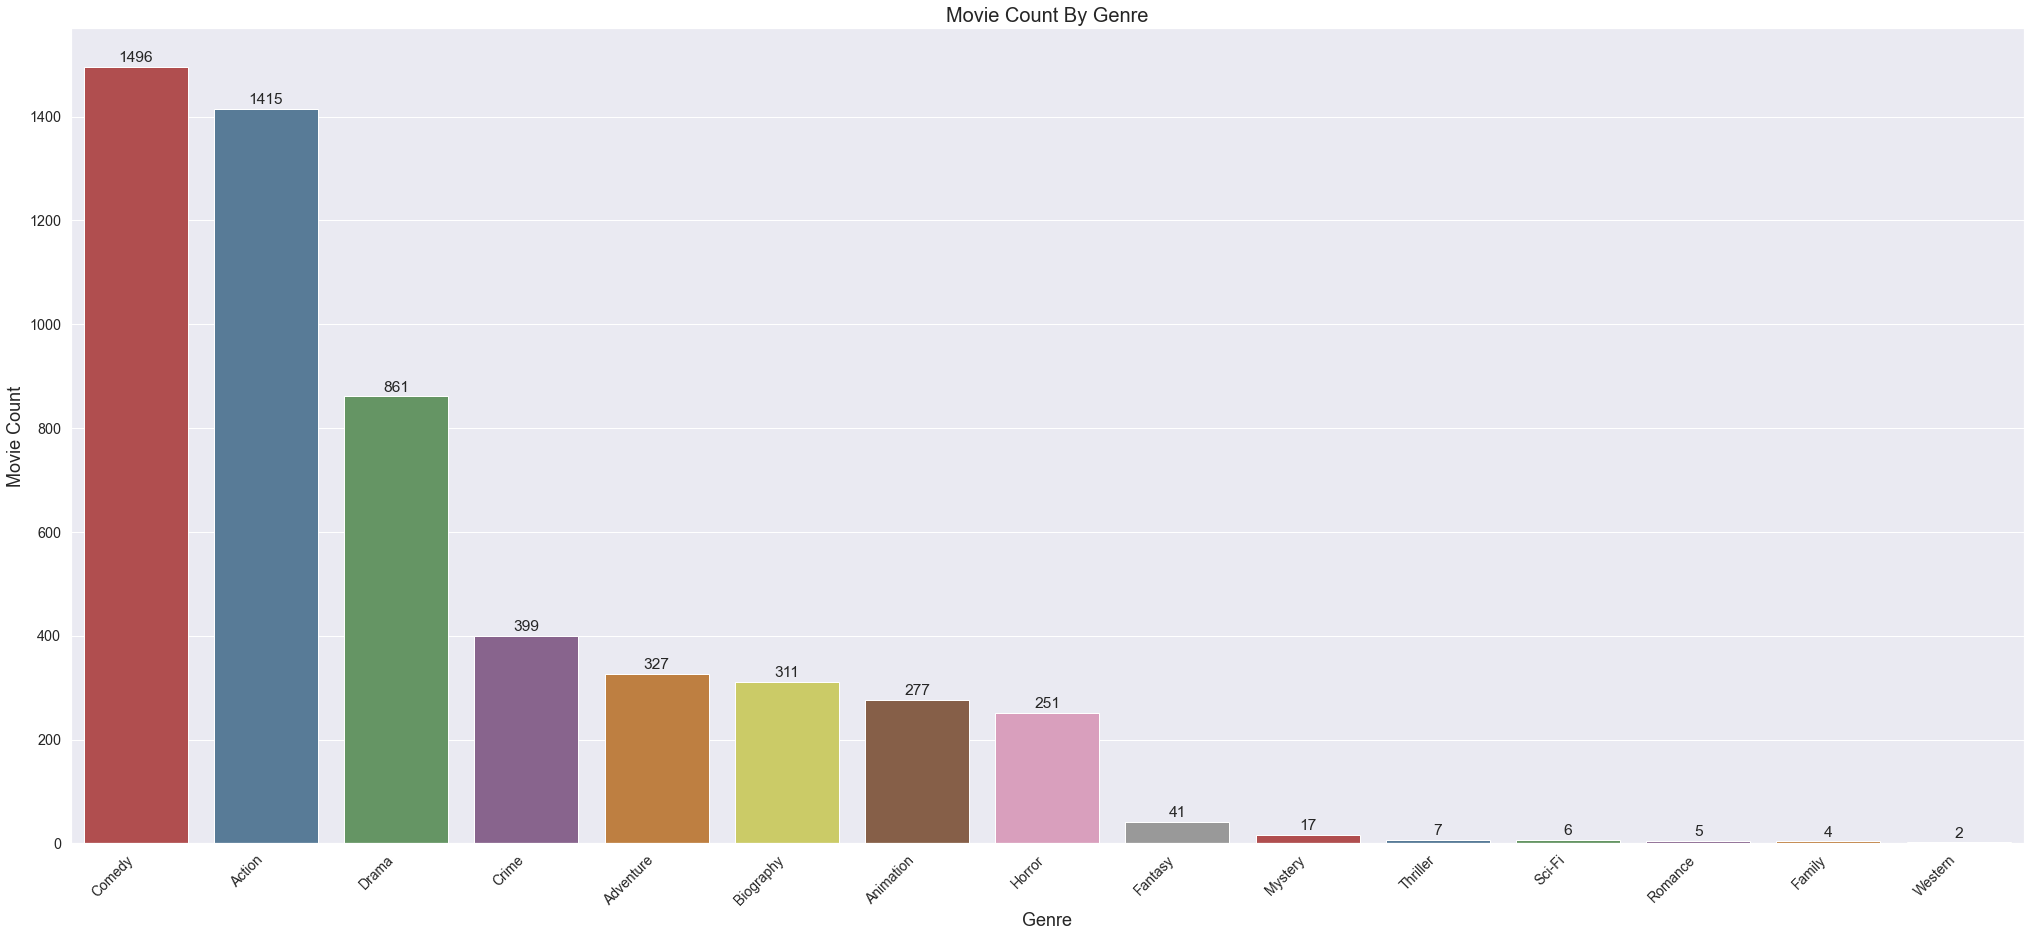

In [20]:
# Get the counts of each genre and sort from largest to smallest
genre_counts = cat_variable['genre'].value_counts()
genre_counts = genre_counts.sort_values(ascending=False)

# Create the countplot with the sorted order
f, axes = plt.subplots(1, 1, figsize=(35, 15))
ax = sns.countplot(
    x='genre', 
    data=cat_variable, 
    order=genre_counts.index  # Use the sorted genre order
)

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')

# Set plot title and labels
plt.title('Movie Count By Genre', fontsize=20)
plt.ylabel('Movie Count', fontsize=18)
plt.xlabel('Genre', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)

plt.show()

As seen from the graph above, Comedy movies are the most frequent movie genre. The top 3 dominant movie genres are Comedy, Action and Drama.

### 3) Top movies based on revenue (gross), budget, IMDb score and votes

#### 3.1) Explore revenue by movie titles

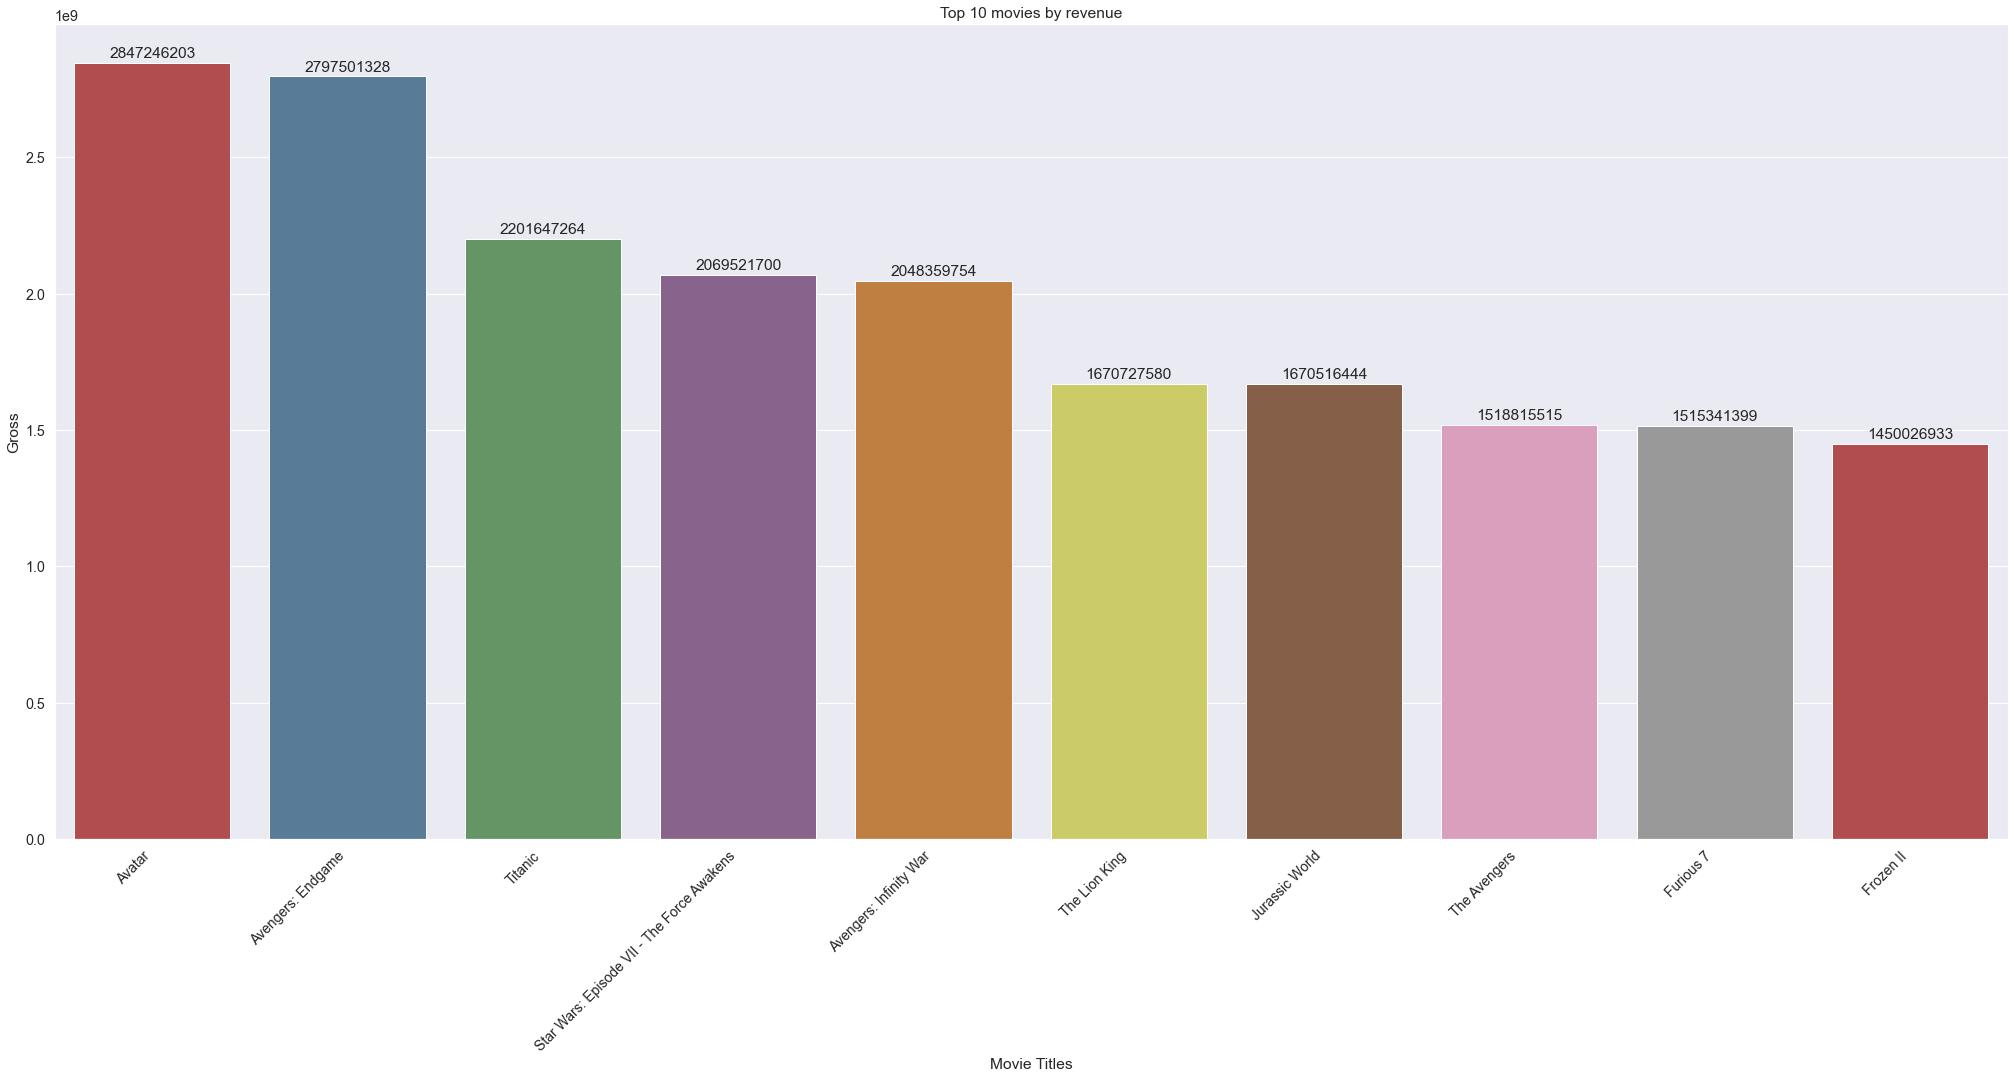

In [21]:
gross_by_movies = df_final[['name', 'gross']] 

f, axes = plt.subplots(1, 1, figsize=(35, 15))
ax = sns.barplot(
        x=gross_by_movies.sort_values(by = 'gross', ascending=False).head(10).name, 
        y=gross_by_movies.sort_values(by = 'gross', ascending=False).head(10).gross)

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')
    
plt.title('Top 10 movies by revenue')
plt.ylabel('Gross')
plt.xlabel('Movie Titles')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.show()

Top 5 movies from the given dataset based on their revenue (gross) are the following: Avatar, Avengers:Endgame, Titanic, Star Wars Episode VII - The Force Awakens and Avengers:Infinity War.

#### 3.2) Explore budget by movie titles

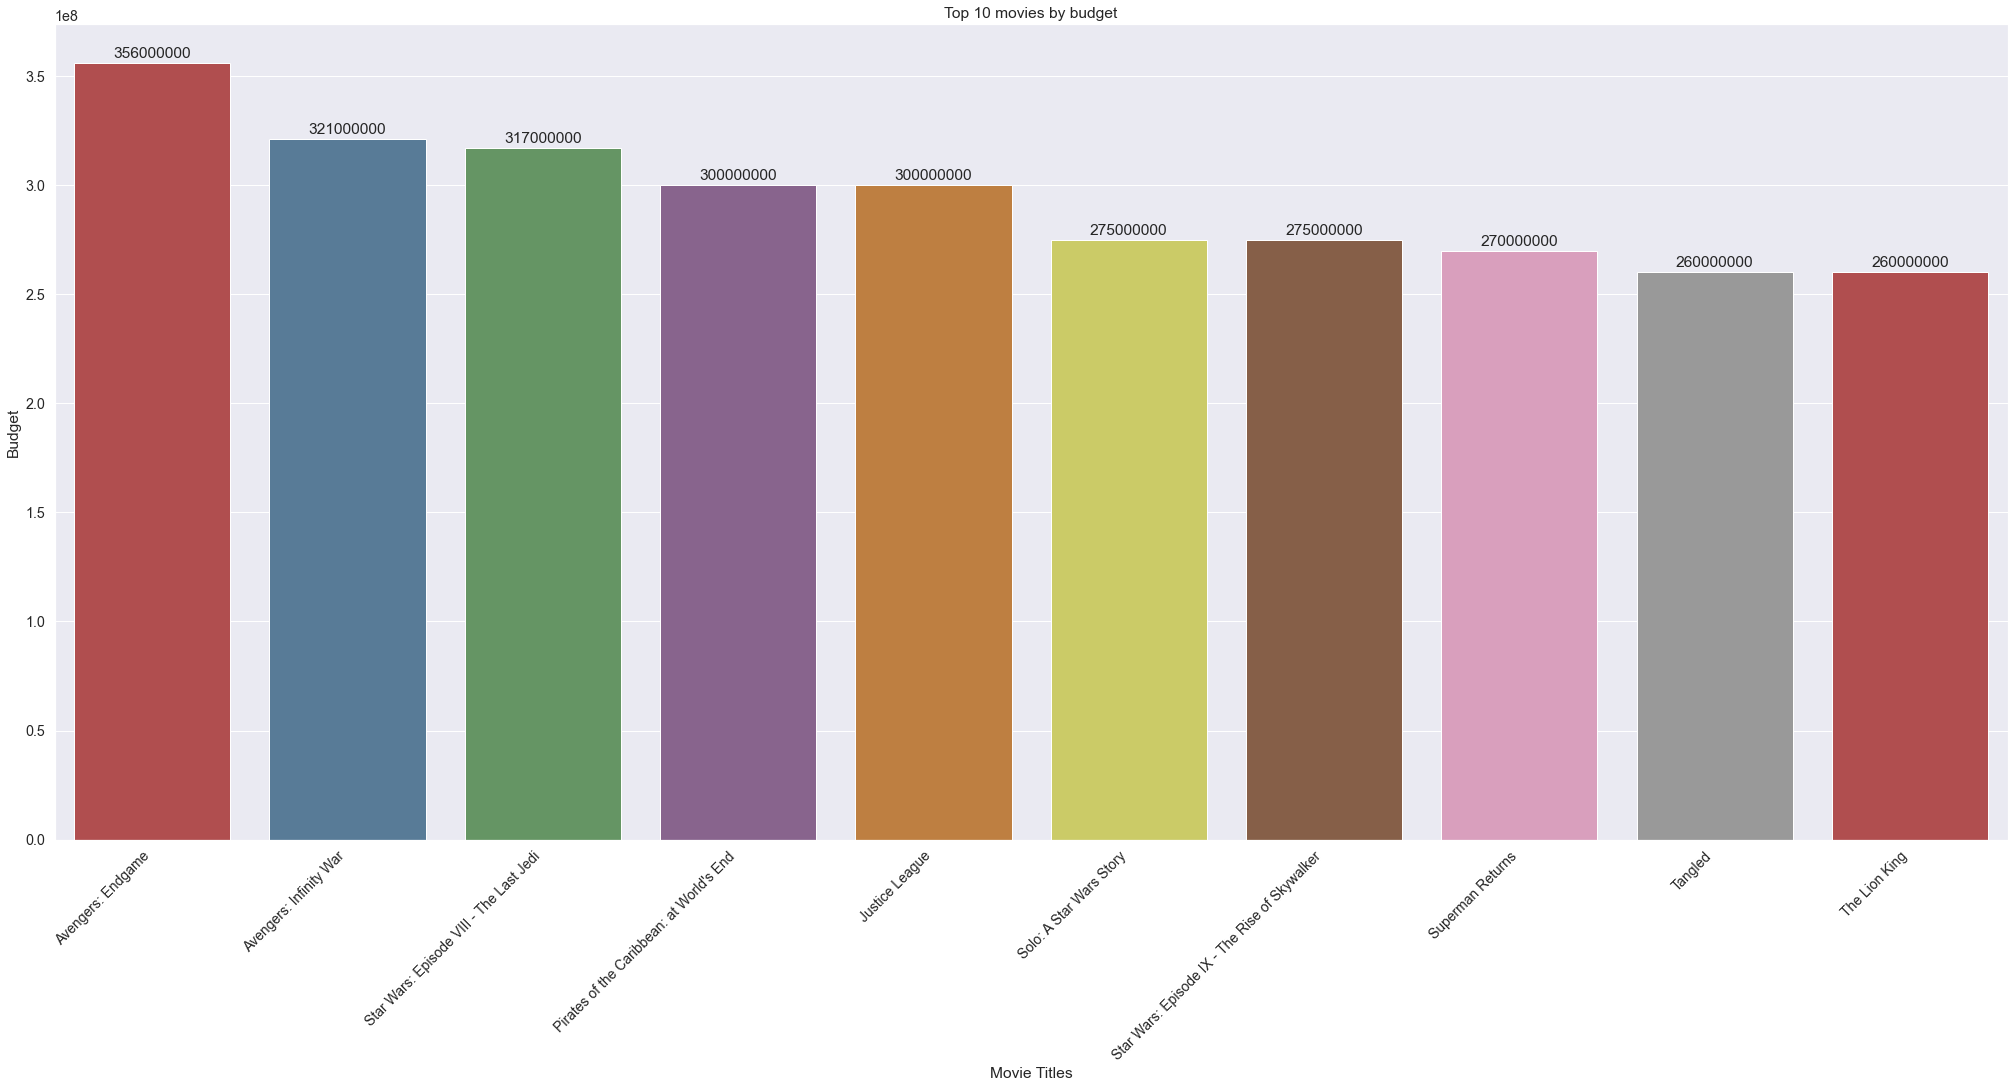

In [22]:
gross_by_movies = df_final[['name', 'budget']] 

f, axes = plt.subplots(1, 1, figsize=(35, 15))
ax = sns.barplot(
        x=gross_by_movies.sort_values(by = 'budget', ascending=False).head(10).name, 
        y=gross_by_movies.sort_values(by = 'budget', ascending=False).head(10).budget)

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')
    
plt.title('Top 10 movies by budget')
plt.ylabel('Budget')
plt.xlabel('Movie Titles')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.show()

Top 5 movies from the given dataset based on their budget are the following: Avengers:Endgame, Avengers:Infinity War, Star Wars Episode VIII - The Last Jedi, Pirates of the Carribean: at World's End and Justice League.

#### 3.3) Explore IMDb score by movie titles

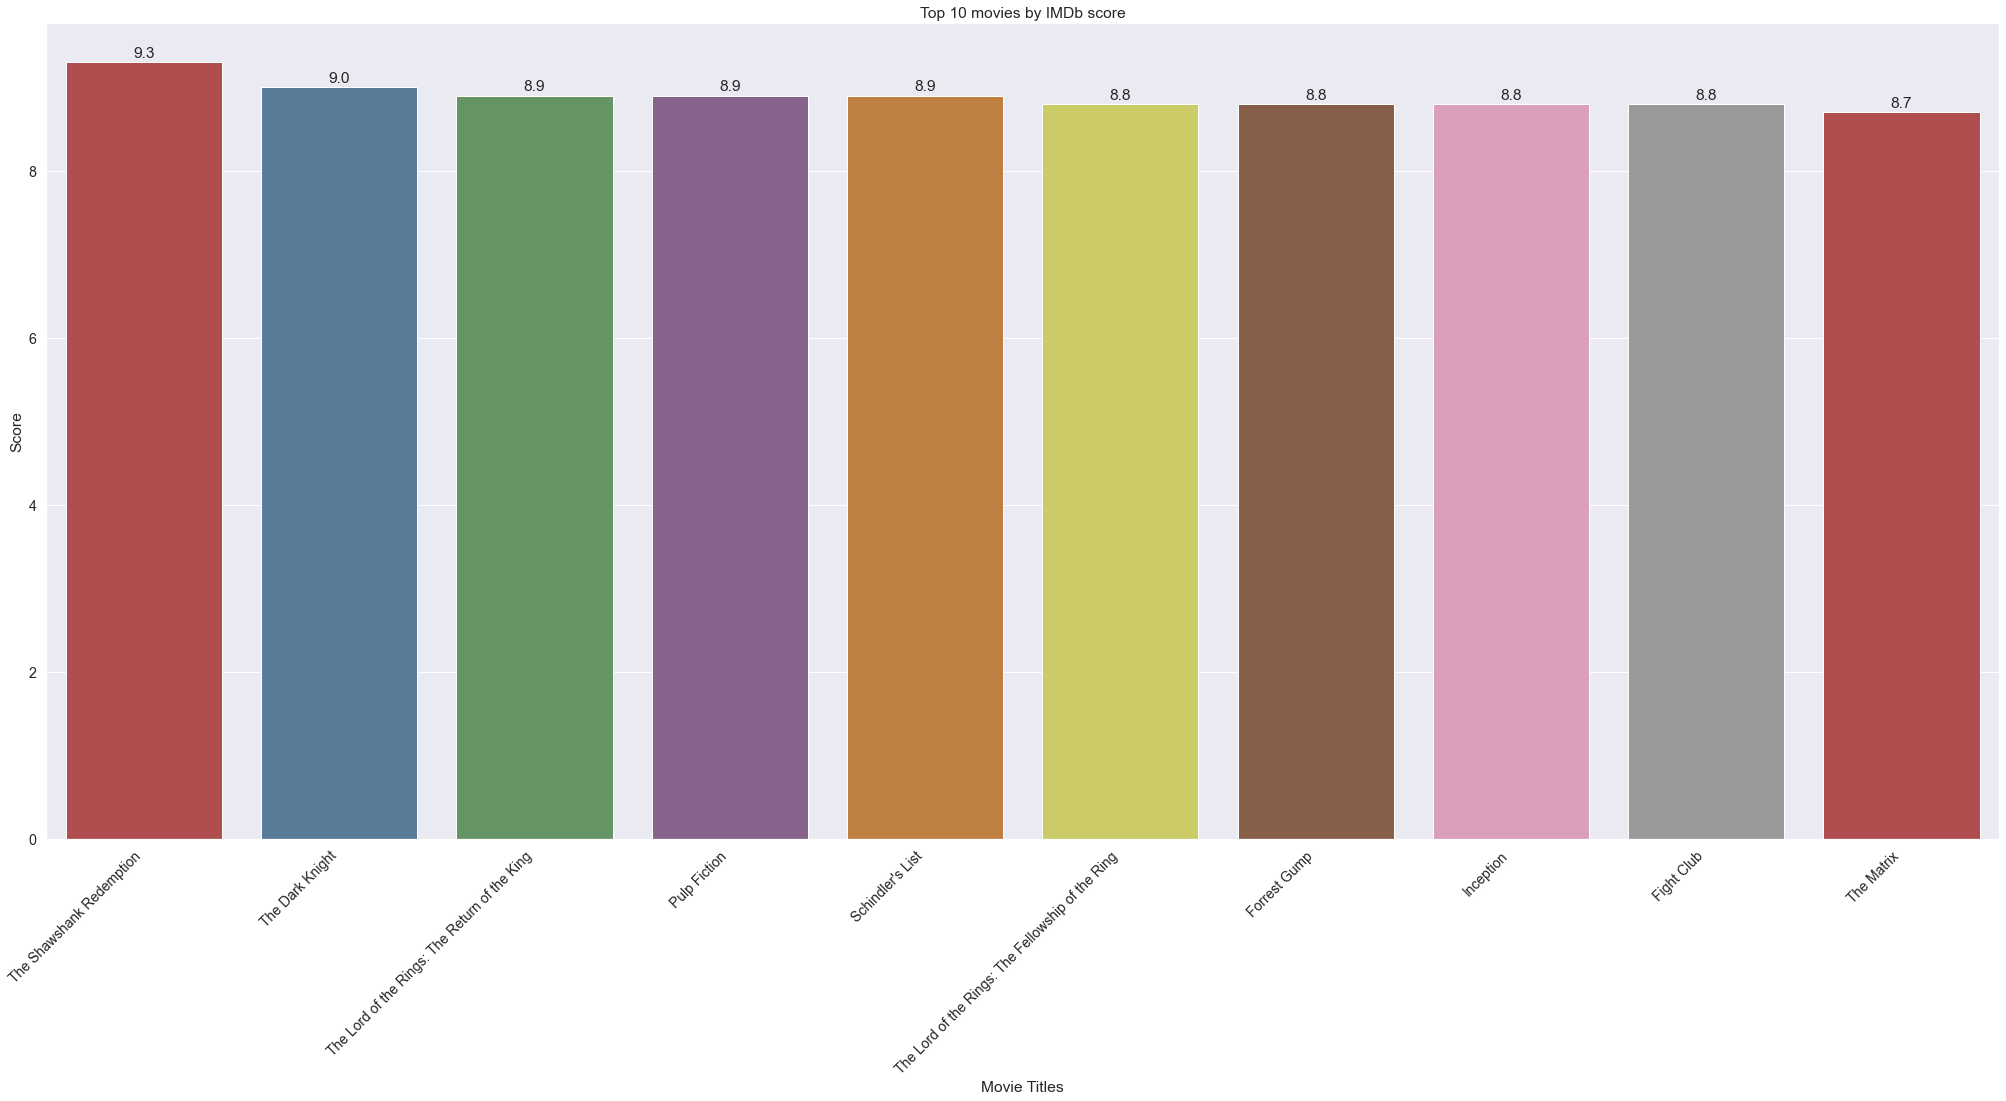

In [23]:
gross_by_movies = df_final[['name', 'score']] 

f, axes = plt.subplots(1, 1, figsize=(35, 15))
ax = sns.barplot(
        x=gross_by_movies.sort_values(by = 'score', ascending=False).head(10).name, 
        y=gross_by_movies.sort_values(by = 'score', ascending=False).head(10).score)

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')
    
plt.title('Top 10 movies by IMDb score')
plt.ylabel('Score')
plt.xlabel('Movie Titles')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.show()

Top 5 movies from the given dataset based on their IMDb score are the following: The Shawshank Redemption, The Dark Knight, Pulp Fiction, The Lord of the Rings: The Return of the King and Schindler's List.

#### 3.4) Explore votes by movie titles

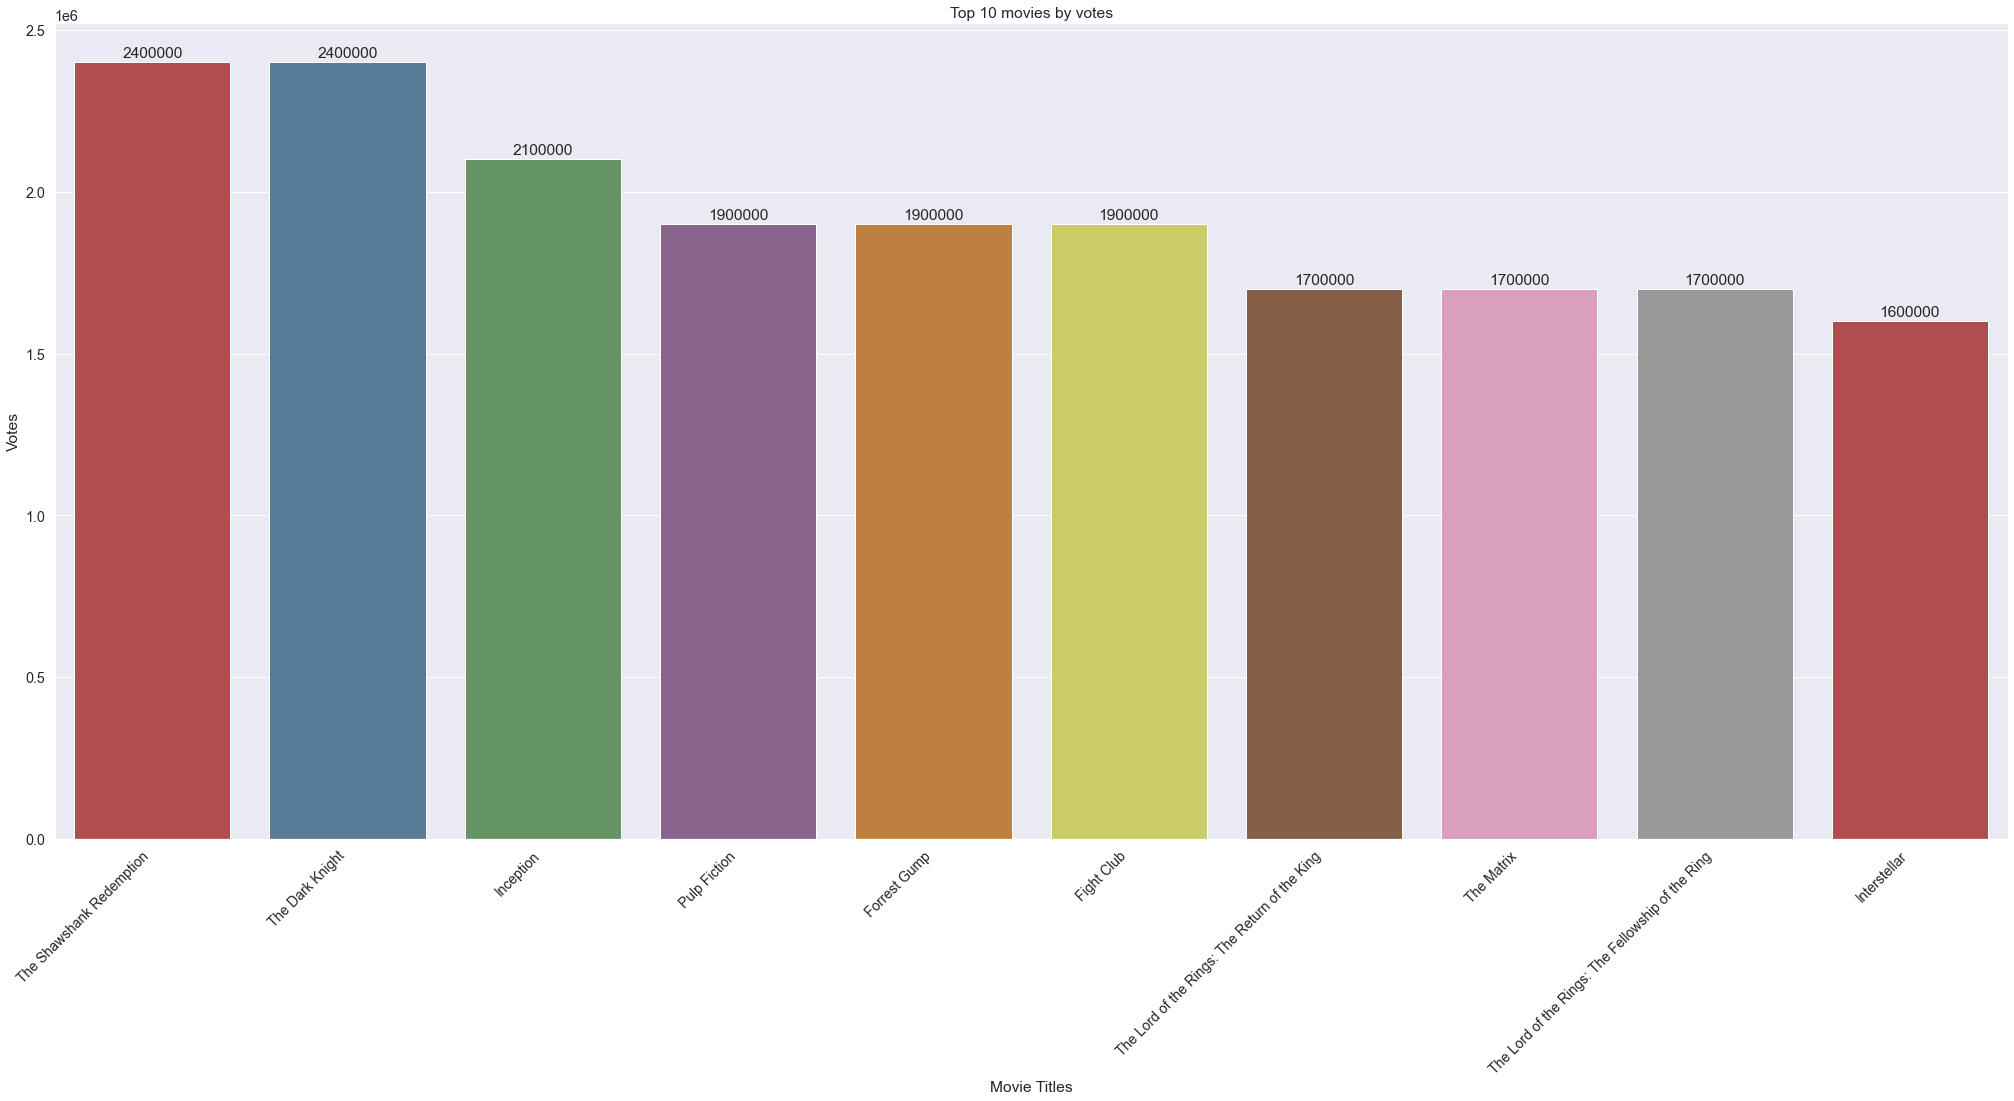

In [24]:
gross_by_movies = df_final[['name', 'votes']] 

f, axes = plt.subplots(1, 1, figsize=(35, 15))
ax = sns.barplot(
        x=gross_by_movies.sort_values(by = 'votes', ascending=False).head(10).name, 
        y=gross_by_movies.sort_values(by = 'votes', ascending=False).head(10).votes)

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')
    
plt.title('Top 10 movies by votes')
plt.ylabel('Votes')
plt.xlabel('Movie Titles')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.show()

Top 5 movies from the given dataset based on their votes are the following: The Dark Knight, The Shawshank Redemption, Inception, Fight Club and Pulp Fiction.

Based on the four plots above, the top 5 movies from feature to feature are quite different. For example, none of the top 5 movies based on gross match the top 5 movies based on IMDb score and votes. This imply that movies which are popular and have a high IMDb rating may not generate lots of revenue. For example, The Shawshank Redemption, which has the highest IMDb rating of 9.3, only managed to generate about 73.3 million of revenue.

### 4) Correlations

In Question 3, the top 5 movies based on gross, budget, IMDb score and vote were quite different regardless of the features. Next, let's investigate the correlations between each feature.

In [25]:
# Correlation coefficient value between each feature using pearson as the method

df_final_corr = df_final[['gross', 'budget', 'score', 'votes']]
df_final_corr.corr(method = 'pearson')

,gross,budget,score,votes
gross,1.000000,0.740218,0.222715,0.614705
budget,0.740218,1.000000,0.072208,0.439594
score,0.222715,0.072208,1.000000,0.474485
votes,0.614705,0.439594,0.474485,1.000000


C:\Users\siyan\AppData\Local\Temp\ipykernel_15648\1395493668.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  df_final_corr_pairplot.fig.show()


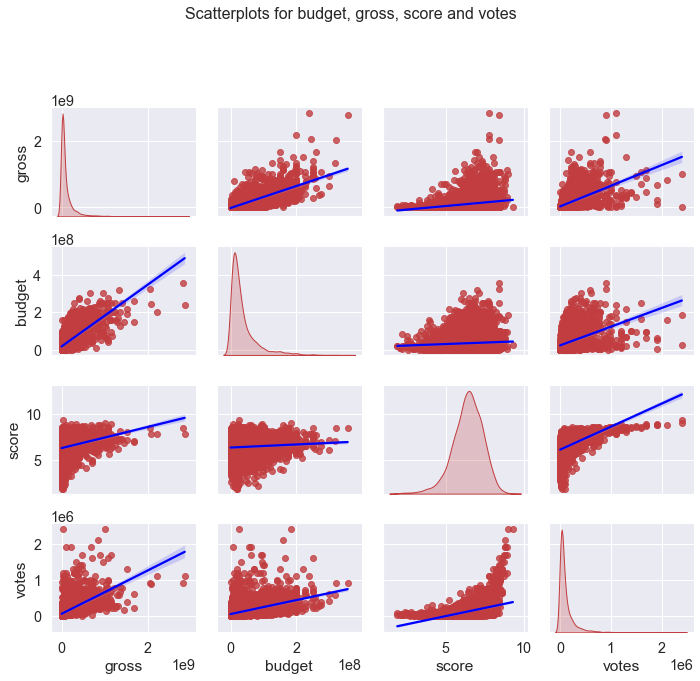

In [26]:
# Correlation plot visualisation

df_final_corr_pairplot = sns.pairplot(
    df_final_corr, 
    kind="reg", 
    diag_kind="kde", 
    diag_kws=dict(shade=True), 
    plot_kws=dict(line_kws={'color': 'blue'})  # Set regression line color to red
)

# Add title and adjust layout
df_final_corr_pairplot.fig.suptitle('Scatterplots for budget, gross, score and votes\n', fontsize=16)
df_final_corr_pairplot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
df_final_corr_pairplot.fig.show()

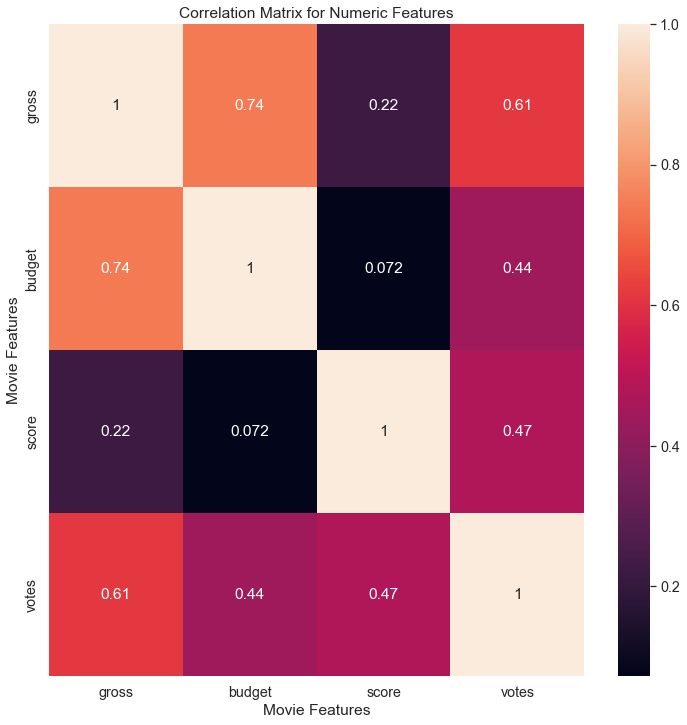

In [27]:
# Let's visualise the correlation coefficient values on a correlation matrix
df_final_corr_matrix = df_final_corr.corr(method = 'pearson')
sns.heatmap(df_final_corr_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features') 
plt.ylabel('Movie Features')
plt.show()

Assume that correlation coefficient > 0.5 is high and < 0.5 is low. Based on the pairplot and correlation matrix: <br>
- Budget and gross have a high correlation coefficient of 0.74 <br> 
- Votes and gross have a high correlation coefficient of 0.61 <br>
- Score and gross have a low correlation coefficient of 0.22 <br>
- Votes and budget have a low correlation coefficient of 0.44 <br>
- Score and budget have a low correlation coefficient of 0.072 <br>
- Votes and score have a low correlation coefficient of 0.47 <br>

Since there is a relatively strong positive relationship between gross and budget, this suggest that an increase in movie budget leads to an increase in movie revenue. Likewise goes for gross and votes where an increase in movie revenue leads to an increase in votes.

## Conclusion

These are the following findings based on the result of exploratory data analysis: <br>
- The top 5 stars with the biggest number of appearances are Nicolas Cage, Robert De Niro, Tom Hanks, Bruce Willis and Tom Cruise. <br>
- Generally, the number of movies in each movie genre show an increase in numbers from 1980 to 2020. Action and comedy seems to be the more frequent and prevalent genre in movies through all these years as compared to other genres. The top 3 dominant movie genres are Comedy, Action and Drama. <br>
- Top 5 movies based on their revenue (gross) are the following: Avatar, Avengers:Endgame, Titanic, Star Wars Episode VII - The Force Awakens and Avengers:Infinity War. <br>
- Top 5 movies based on their budget are the following: Avengers:Endgame, Avengers:Infinity War, Star Wars Episode VIII - The Last Jedi, Pirates of the Carribean: at World's End and Justice League. <br>
- Top 5 movies based on their IMDb score are the following: The Shawshank Redemption, The Dark Knight, Pulp Fiction, The Lord of the Rings: The Return of the King and Schindler's List. <br>
- Top 5 movies based on their votes are the following: The Dark Knight, The Shawshank Redemption, Inception, Fight Club and Pulp Fiction. <br>
- Based on the correlation coefficients and plots, there is a relatively strong positive relationship between gross and budget (0.74) & gross and votes (0.61). <br>

Recommedations: <br>
- This exploratory and correlation analysis serves as a starting point to investigate the underlying patterns and trends in the dataset to identify the important factors that can affect movie revenue. For example, by determining a positive relationship between budget and revenue, directors can be prompted to prioritize budget planning for a movie, ensuring that expenses are correctly allocated to specific aspects, such as CGI in an action film. 

Limitation of analysis: <br>
- The dataset is small and only limited to 7669 rows of data. After removal of null values, I have only 5419 rows of data left for subsequent analysis.
- Data cleaning process can better in terms of handling missing/null values. This dataset contains quite a lot of missing values especially the budget column. By simply removing the whole row of data due to a missing value, I may omit some information which can be crucial for subsequent analysis. A better practice of handling missing values could be inputing missing values with mean/median or simply 0, depending on the context of the dataset.




## Appendix

### Uni-Variate Analysis

Check the Summary Statistics of gross using `describe`.

In [28]:
# Extract gross as a pandas dataframe
gross = pd.DataFrame(df['gross'])

In [29]:
# See summary statistics
gross_stats = gross.describe()
gross_stats = gross_stats.round()
gross_stats

,gross
count,5.421000e+03
mean,1.032297e+08
std,1.873027e+08
min,3.090000e+02
25%,1.073640e+07
50%,3.686941e+07
75%,1.124625e+08
max,2.847246e+09


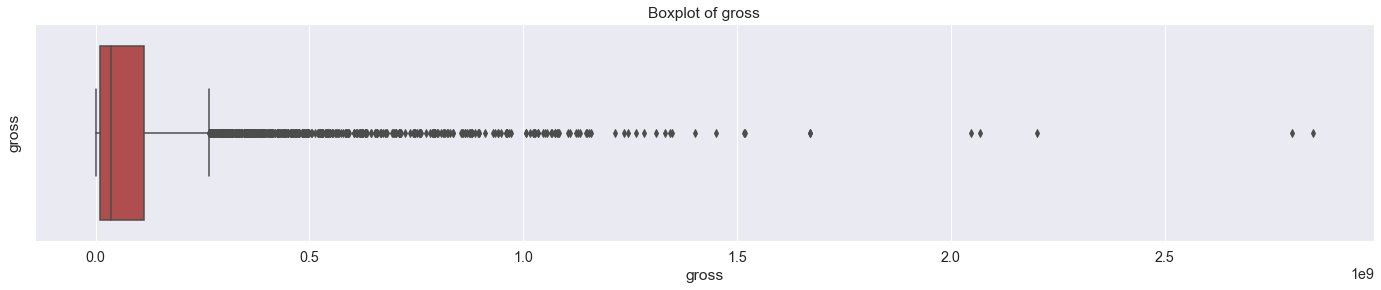

In [30]:
# Check summary statistics using boxplot
f, axes = plt.subplots(1, 1, figsize=(24, 4))
sns.boxplot(data = gross, x = 'gross', orient = "h")
#sns.boxplot(y='gross', data=gross, orient="h")
plt.title('Boxplot of gross')
plt.ylabel('gross')
plt.show()

<AxesSubplot:ylabel='Count'>

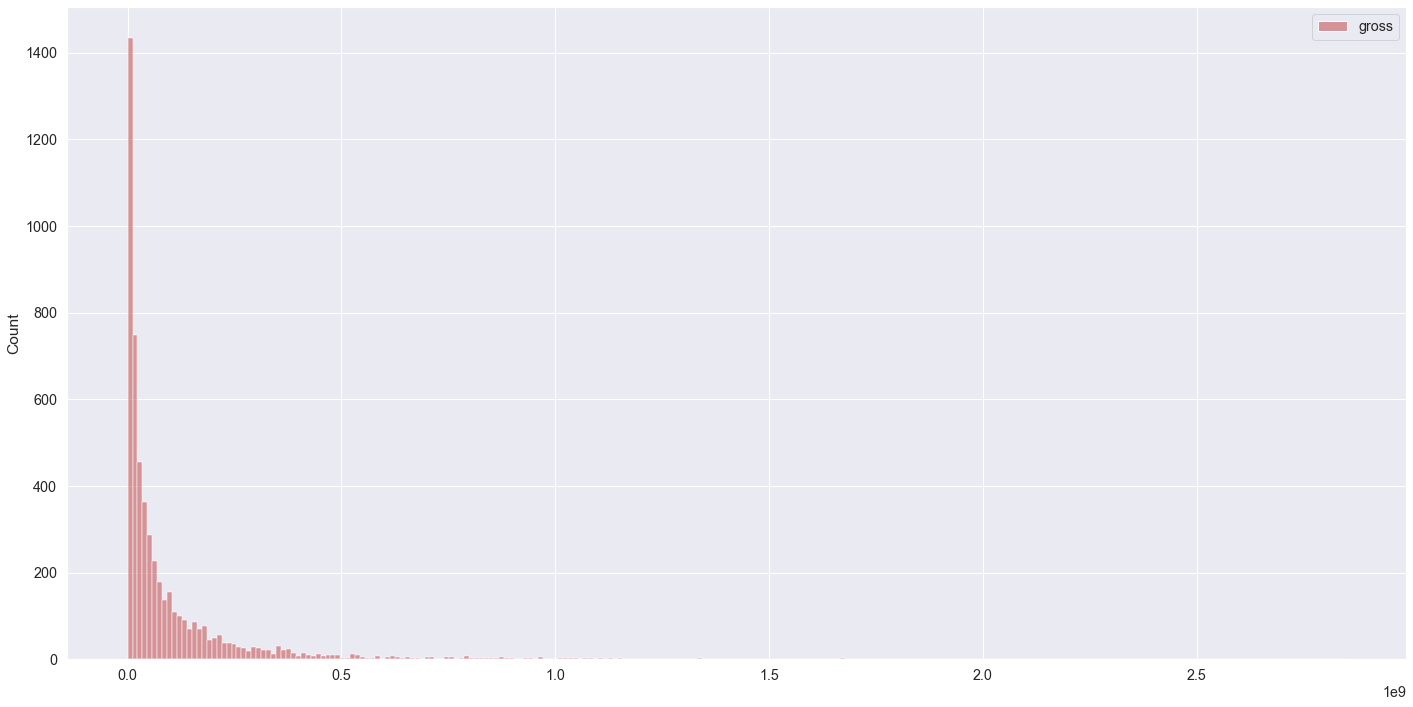

In [31]:
#sns.histplot(gross, kde = False, color = "red")
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sns.histplot(gross, kde = False, color = "red")

In [32]:
year = pd.DataFrame(df['year'])
score = pd.DataFrame(df['score'])
votes = pd.DataFrame(df['votes'])
budget = pd.DataFrame(df['budget'])
runtime = pd.DataFrame(df['runtime'])

numDF = pd.DataFrame(df[["gross", "year", "score", "votes", "budget", "runtime"]])
numDF_stats = numDF.describe()
numDF_stats = numDF_stats.round(1)
numDF_stats

,gross,year,score,votes,budget,runtime
count,5.421000e+03,5421.0,5421.0,5421.0,5421.0,5421.0
mean,1.032297e+08,2001.7,6.4,115066.1,36009170.5,108.2
std,1.873027e+08,10.5,1.0,184407.3,41573374.0,18.1
min,3.090000e+02,1980.0,1.9,195.0,6000.0,63.0
25%,1.073640e+07,1993.0,5.8,19000.0,10000000.0,95.0
50%,3.686941e+07,2002.0,6.5,52000.0,21800000.0,105.0
75%,1.124625e+08,2011.0,7.1,129000.0,45000000.0,118.0
max,2.847246e+09,2020.0,9.3,2400000.0,356000000.0,271.0


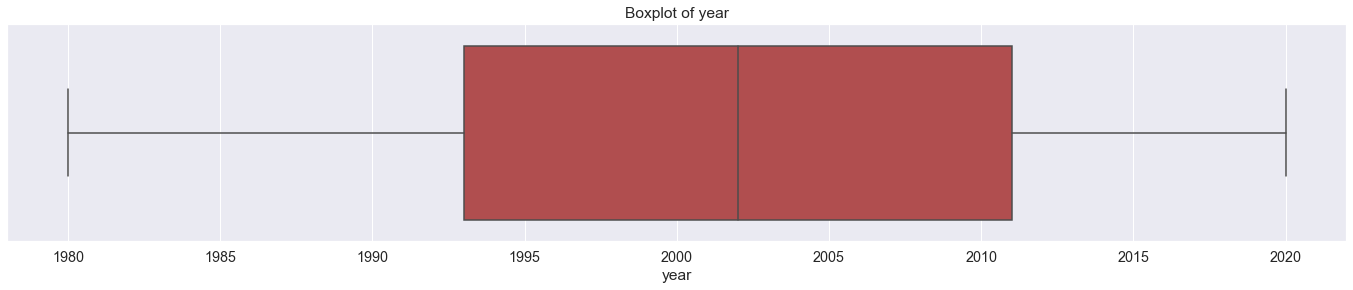

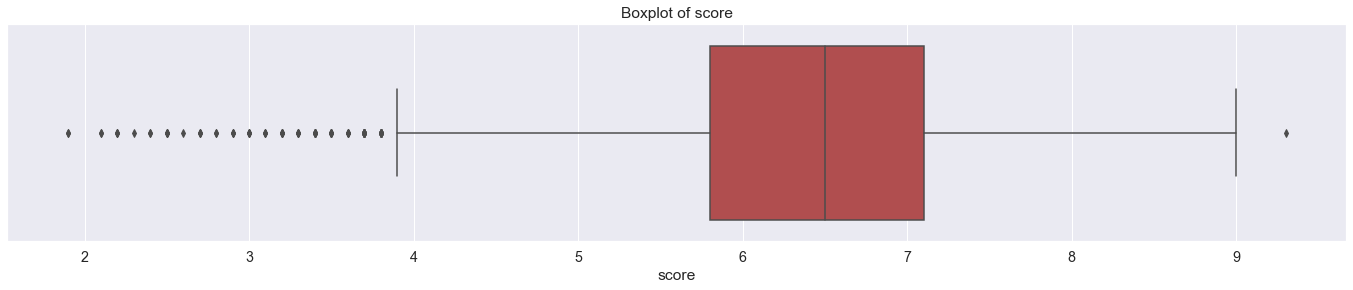

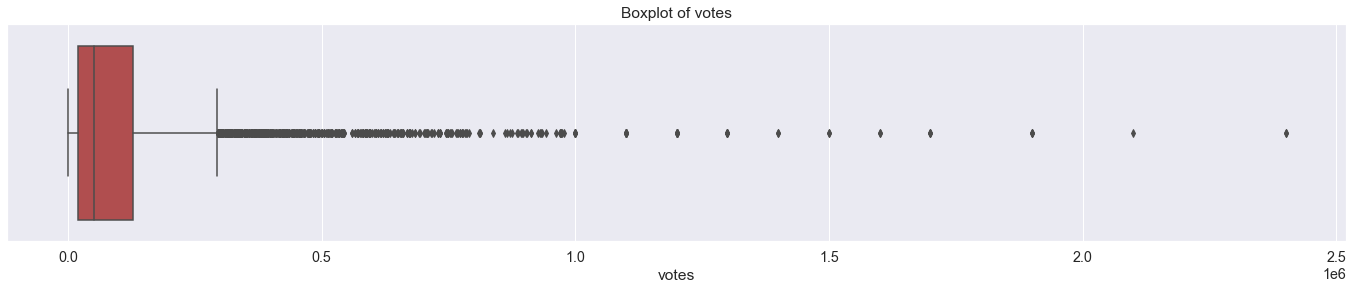

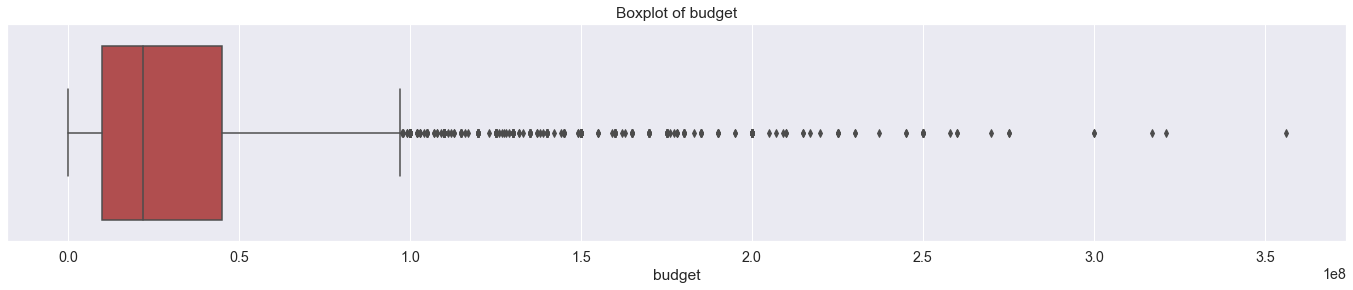

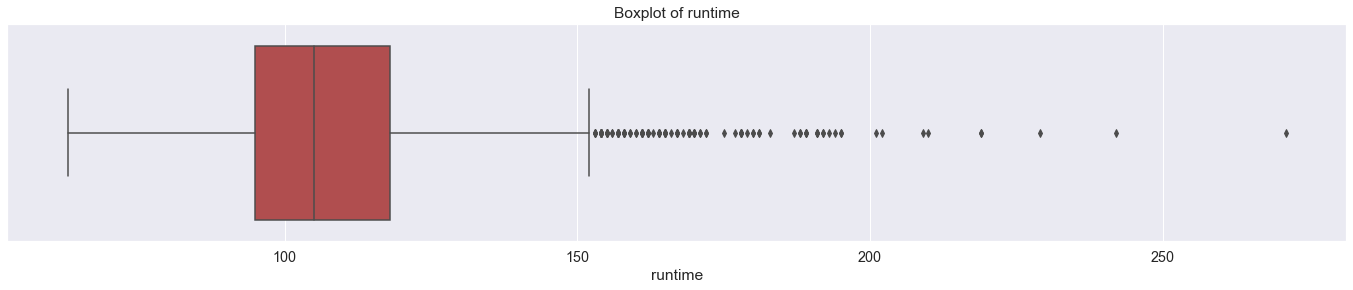

In [33]:
year = pd.DataFrame(df['year'])
score = pd.DataFrame(df['score'])
votes = pd.DataFrame(df['votes'])
budget = pd.DataFrame(df['budget'])
runtime = pd.DataFrame(df['runtime'])

f, axes = plt.subplots(1, 1, figsize=(24, 4))
sns.boxplot(data = year, x = 'year', orient = "h")
plt.title('Boxplot of year')
plt.show()

f, axes = plt.subplots(1, 1, figsize=(24, 4))
sns.boxplot(data = score, x = 'score', orient = "h")
plt.title('Boxplot of score')
plt.show()

f, axes = plt.subplots(1, 1, figsize=(24, 4))
sns.boxplot(data = votes, x = 'votes', orient = "h")
plt.title('Boxplot of votes')
plt.show()

f, axes = plt.subplots(1, 1, figsize=(24, 4))
sns.boxplot(data = budget, x = 'budget', orient = "h")
plt.title('Boxplot of budget')
plt.show()

f, axes = plt.subplots(1, 1, figsize=(24, 4))
sns.boxplot(data = runtime, x = 'runtime', orient = "h")
plt.title('Boxplot of runtime')
plt.show()

Genre Categories : 15
Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64


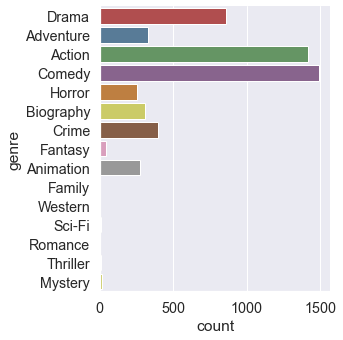

In [36]:
cat_variable = pd.DataFrame(df[['rating', 'genre', 'year', 'director', 'writer', 'star', 'country', 'company']])


# Generations in the Dataset
print("Genre Categories :", len(cat_variable["genre"].unique()))

print(cat_variable["genre"].value_counts())
sns.catplot(y = "genre", data = cat_variable, kind = "count")